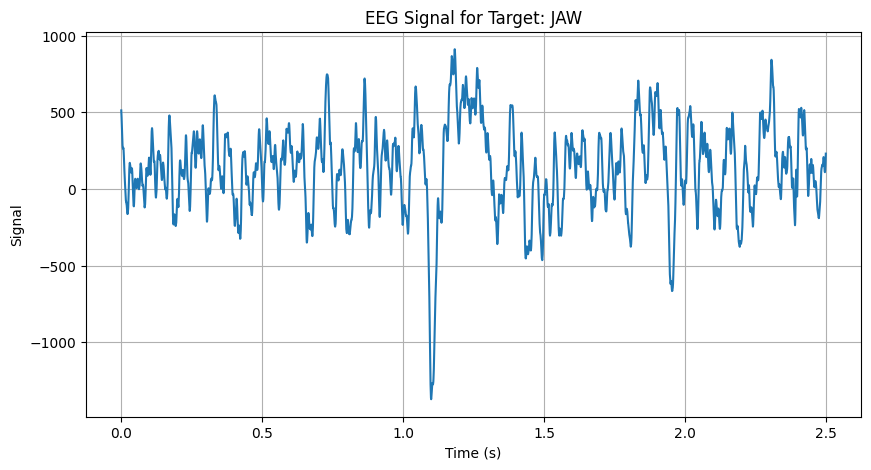

<Figure size 640x480 with 0 Axes>

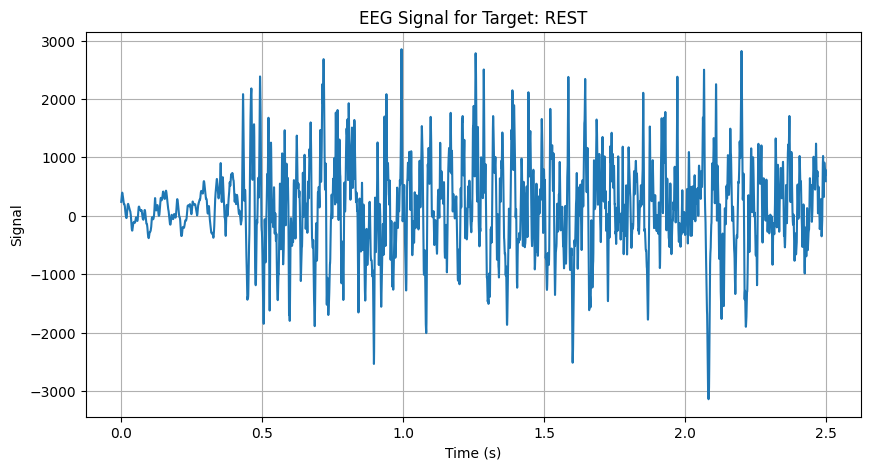

<Figure size 640x480 with 0 Axes>

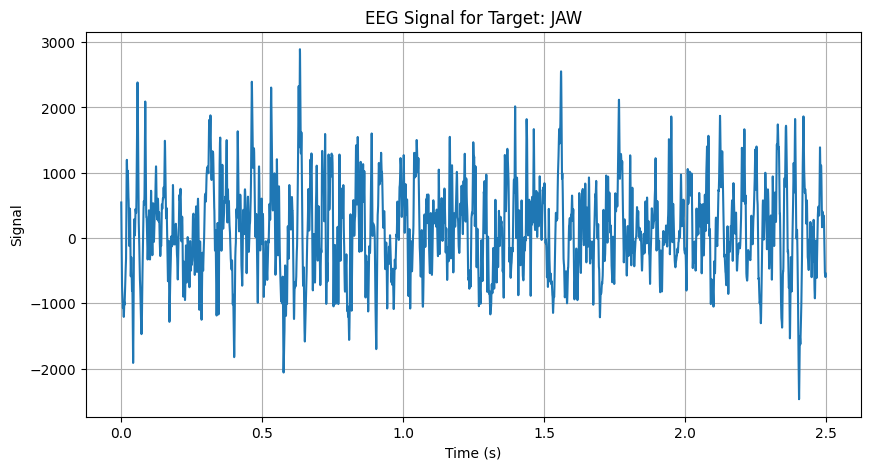

<Figure size 640x480 with 0 Axes>

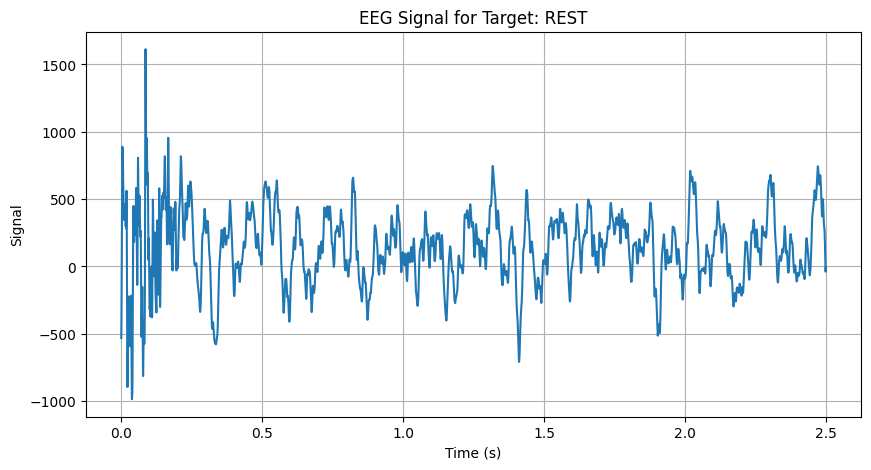

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the function to plot EEG signal
def plot_eeg_signal(signal, target, sampling_rate, time_duration, c):
    # Create time axis
    time = [i / sampling_rate for i in range(len(signal))]
    
    # Plot EEG signal
    plt.figure(figsize=(10, 5))
    plt.plot(time, signal)
    plt.title(f"EEG Signal for Target: {target}")
    plt.xlabel("Time (s)")
    plt.ylabel("Signal")
    plt.grid(True)
    
    # Display the plot
    plt.show()

    # Ask the user for input
    choice = input("Enter 1 for odd folder, 2 for even folder, or 3 to skip saving: ")

    # Return the user's choice
    return choice

# Define function to process CSV file
def process_csv_file(csv_file, sampling_rate, time_duration, c):
    # Read CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
        signal = row[:-1]  # Exclude the last column (target)
        target = row[-1]   # Target value
        
        # Plot EEG signal and get user input
        choice = plot_eeg_signal(signal, target, sampling_rate, time_duration, c)

        # Create folders for odd and even rows if they don't exist
        odd_folder = r"C:\Users\Joel\Desktop\PYTHON\BCI_for_wheelchair_automation\odd"
        even_folder = r"C:\Users\Joel\Desktop\PYTHON\BCI_for_wheelchair_automation\even"
        os.makedirs(odd_folder, exist_ok=True)
        os.makedirs(even_folder, exist_ok=True)

        # Save the plot based on user's choice
        if choice == '1':
            save_folder = odd_folder
        elif choice == '2':
            save_folder = even_folder
        else:
            continue  # Skip saving if the choice is not 1 or 2
        
        # Save the plot in the specified folder
        plt.savefig(os.path.join(save_folder, f"eeg_signal_{target}_{c}.png"))

        c += 1

# Example usage
csv_file = r"C:\Users\Joel\Desktop\PYTHON\BCI_for_wheelchair_automation\test3.csv"
sampling_rate = 10000  # Example sampling rate (samples per second)
time_duration = 2.5   # Example time duration for each plot (seconds)
c = 1
process_csv_file(csv_file, sampling_rate, time_duration, c)


In [2]:
#find the number of files in the odd and even folders

odd_folder = r"C:\Users\Joel\Desktop\PYTHON\BCI_for_wheelchair_automation\odd"
even_folder = r"C:\Users\Joel\Desktop\PYTHON\BCI_for_wheelchair_automation\even"

odd_files = os.listdir(odd_folder)

even_files = os.listdir(even_folder)

print(f"Number of files in odd folder: {len(odd_files)}")
print(f"Number of files in even folder: {len(even_files)}")



Number of files in odd folder: 68
Number of files in even folder: 119


In [1]:
#convert the images to .wav files and save them in the same folder as the images

import os
from PIL import Image
import numpy as np
import scipy.io.wavfile as wavfile

# Define the function to convert image to .wav file

def convert_image_to_wav(image_file, wav_file):
    # Open the image file
    img = Image.open(image_file)
    
    # Convert the image to grayscale
    img = img.convert("L")
    
    # Convert the image to a NumPy array
    img_array = np.array(img)
    
    # Normalize the image array
    img_array = img_array / 255.0
    
    # Convert the image array to .wav file
    wavfile.write(wav_file, 44100, img_array)

# Convert images to .wav files
odd_folder = r"C:\Users\Joel\Desktop\PYTHON\BCI_for_wheelchair_automation\odd"
even_folder = r"C:\Users\Joel\Desktop\PYTHON\BCI_for_wheelchair_automation\even"

for image_file in os.listdir(odd_folder):
    if image_file.endswith(".png"):
        image_path = os.path.join(odd_folder, image_file)
        wav_file = os.path.join(odd_folder, image_file.replace(".png", ".wav"))
        convert_image_to_wav(image_path, wav_file)

for image_file in os.listdir(even_folder):
    if image_file.endswith(".png"):
        image_path = os.path.join(even_folder, image_file)
        wav_file = os.path.join(even_folder, image_file.replace(".png", ".wav"))
        convert_image_to_wav(image_path, wav_file)


In [6]:
import os
import pandas as pd
from scipy.io import wavfile

def wav_to_csv(input_file, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    sample_rate, data = wavfile.read(input_file)
    output_file = os.path.join(output_folder, os.path.splitext(os.path.basename(input_file))[0] + '.csv')
    pd.DataFrame(data).to_csv(output_file, index=False, header=False)

    
# example
input_file = 'SerialReading1.wav'
output_folder = 'artifacts/csv_output_folder'

wav_to_csv(input_file, output_folder)

In [7]:
import pandas as pd
df_wav = pd.read_csv('artifacts/csv_output_folder/SerialReading.csv')
df_ser = pd.read_csv('artifacts/experiment_data/sensor_data_2024-02-27_12-25-57.csv')



In [8]:
df_wav.head()

,722
0,731
1,740
2,749
3,757
4,765


In [9]:
df_ser.head()

,5997.963074602232
0,5964.581151
1,5930.741134
2,5896.443098
3,5861.687105
4,5826.473209
